Imports necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt #for visualization
import numpy as np #for maths operations`
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Data Preparation

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Converts pixel values from 0-255 to 0-1 (easier for neural networks to process)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Adds a channel dimension (required for Conv2D layers) changing shape from (28x28) to (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Building the Neural Network

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), #Two Conv2D layers (32 and 64 filters) to detect patterns
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), #Two Conv2D layers (32 and 64 filters) to detect patterns
    layers.MaxPooling2D((2,2)), #MaxPooling layers to reduce image size
    layers.Flatten(), #Flatten layer to convert 2D features to 1D
    layers.Dense(64, activation='relu'), # Final dense layers for classification
    layers.Dense(10)  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #Sets up training with Adam optimizer and cross-entropy loss
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1) #Trains for 10 passes through the data, using 10% of training data for validation


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.7596 - loss: 0.6615 - val_accuracy: 0.8718 - val_loss: 0.3524
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.8832 - loss: 0.3278 - val_accuracy: 0.8907 - val_loss: 0.3052
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.8981 - loss: 0.2785 - val_accuracy: 0.8877 - val_loss: 0.3099
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9100 - loss: 0.2458 - val_accuracy: 0.9025 - val_loss: 0.2620
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9209 - loss: 0.2137 - val_accuracy: 0.9053 - val_loss: 0.2591
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9307 - loss: 0.1896 - val_accuracy: 0.9072 - val_loss: 0.2527
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9368 - loss: 0.1718 - val_accuracy: 0.9035 - val_loss: 0.2662
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9444 -

Evaluation and Predictions

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



313/313 - 3s - 9ms/step - accuracy: 0.9056 - loss: 0.3068

Test accuracy: 0.9056000113487244
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


Performance Visualization

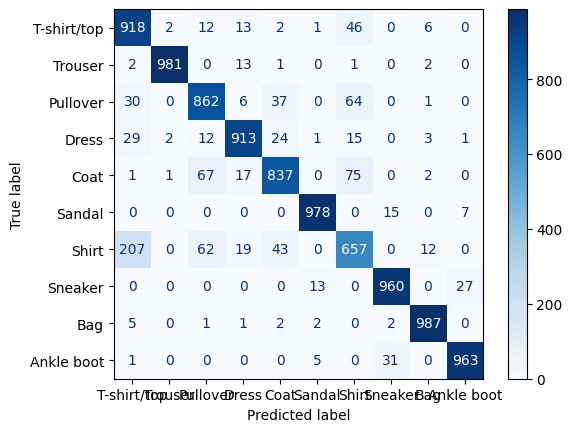

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
disp.plot(cmap=plt.cm.Blues)
plt.show()